# NetworkX 

Looking for patterns in connectivity graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import collections

In [2]:
import os
import pickle

In [3]:
DATA_FOLDER = '../data'
PICKLE_FOLDER = '../pickles'

In [4]:
df = pd.read_csv(f'{DATA_FOLDER}/patients-cleaned.csv', index_col=0)

In [5]:
df.head()

,age,sex,target
0,24.750,1,0
1,27.667,1,0
2,34.167,1,0
3,28.917,1,0
4,31.917,0,0


In [6]:
print('Samples: ', df.shape[0])

Samples:  190


In [7]:
with open(f'{PICKLE_FOLDER}/test-indices.pickle', 'rb') as f:
    test_indices = pickle.load(f)

y_test = df.iloc[test_indices]['target'].values
train_indices = list(set(range(df.shape[0])) - set(test_indices))

In [8]:
df = df.iloc[train_indices].reset_index(drop=True)

In [9]:
y_train = df['target'].values

In [10]:
control_size = len(y_train) - sum(y_train)
patient_size = sum(y_train)

print(f'Controls {control_size} vs. patients {patient_size}')

Controls 65 vs. patients 75


In [11]:
with open(f'{PICKLE_FOLDER}/fc-pearson.pickle', 'rb') as f:
    fc_pearson = pickle.load(f)

with open(f'{PICKLE_FOLDER}/fc-spearman.pickle', 'rb') as f:
    fc_spearman = pickle.load(f)

with open(f'{PICKLE_FOLDER}/fc-partial-pearson.pickle', 'rb') as f:
    fc_partial_pearson = pickle.load(f)

fc_pearson = fc_pearson[train_indices]
fc_spearman = fc_spearman[train_indices]
fc_partial_pearson = fc_partial_pearson[train_indices]

In [12]:
target_index_change = 65    # Observe `df`.
subjects, brain_regions, _ = fc_pearson.shape

print('Samples: ', subjects)
print('Features: ', brain_regions)
print('Index where target feature changes: ', target_index_change)

Samples:  140
Features:  90
Index where target feature changes:  65


## Load all connectivity graphs.
### Folders
fc-{corr}-{suffix} for corr in \['pearson', 'spearman', 'partial-pearson'\]

#### Suffixes

 1. gini / sgd
 2. abs-sample-diff / abs-group-avg-diff
 3. knn-abs-sample-diff / knn-abs-group-avg-diff

### Data

{prefix}-binary.pickle and {prefix}-real.pickle

#### Prefixes

1. None
2. {small, large}-knn-{3,5,7,10,15,20,40}
3. {min, max}-th-{0.01, 0.05, 0.1, 0.15}



In [13]:
PICKLE_FOLDER = '../pickles'
CORR = ['pearson', 'spearman', 'partial-pearson']
FC_FOLDER_SUFFIX = [
    ['gini','sgd'],
    ['knn-abs-sample-diff','knn-abs-group-avg-diff'],
    ['abs-sample-diff','abs-group-avg-diff']
]
FC_DATA_PREFIX = [
    [[''],['']],
    [['small', 'large'],[3,5,7,10,15,20,40]],
    [['min','max'],[0.01,0.05,0.1,0.15]]
]

In [14]:
datasets = []
names = []

for corr in CORR:
    for i, (folder_suffixes, data_prefixes) in enumerate(zip(FC_FOLDER_SUFFIX, FC_DATA_PREFIX)):
        for folder_suff in folder_suffixes:
            for data_prefix_0 in data_prefixes[0]:
                for data_prefix_1 in data_prefixes[1]:
                    folder_name = f'fc-{corr}-{folder_suff}'
                    if i == 0:
                        middle = ''
                    elif i == 1:
                        middle = '-knn-'
                    else:
                        middle = '-th-'

                    data_name = f'{data_prefix_0}{middle}{data_prefix_1}'
                    full_name = f'{folder_name}/{data_name}'
                    
                    with open(f'{PICKLE_FOLDER}/{full_name}{"-" if i != 0 else ""}binary.pickle', 'rb') as f:
                        data_binary = pickle.load(f)

                    with open(f'{PICKLE_FOLDER}/{full_name}{"-" if i != 0 else ""}real.pickle', 'rb') as f:
                        data_real = pickle.load(f)

                    # So far save only 'difference from group mean' data.
                    if 'abs-sample-diff' in folder_suff:
                        names.append(full_name)
                        datasets.append((data_binary, data_real))

In [15]:
names

['fc-pearson-knn-abs-sample-diff/small-knn-3',
 'fc-pearson-knn-abs-sample-diff/small-knn-5',
 'fc-pearson-knn-abs-sample-diff/small-knn-7',
 'fc-pearson-knn-abs-sample-diff/small-knn-10',
 'fc-pearson-knn-abs-sample-diff/small-knn-15',
 'fc-pearson-knn-abs-sample-diff/small-knn-20',
 'fc-pearson-knn-abs-sample-diff/small-knn-40',
 'fc-pearson-knn-abs-sample-diff/large-knn-3',
 'fc-pearson-knn-abs-sample-diff/large-knn-5',
 'fc-pearson-knn-abs-sample-diff/large-knn-7',
 'fc-pearson-knn-abs-sample-diff/large-knn-10',
 'fc-pearson-knn-abs-sample-diff/large-knn-15',
 'fc-pearson-knn-abs-sample-diff/large-knn-20',
 'fc-pearson-knn-abs-sample-diff/large-knn-40',
 'fc-pearson-abs-sample-diff/min-th-0.01',
 'fc-pearson-abs-sample-diff/min-th-0.05',
 'fc-pearson-abs-sample-diff/min-th-0.1',
 'fc-pearson-abs-sample-diff/min-th-0.15',
 'fc-pearson-abs-sample-diff/max-th-0.01',
 'fc-pearson-abs-sample-diff/max-th-0.05',
 'fc-pearson-abs-sample-diff/max-th-0.1',
 'fc-pearson-abs-sample-diff/max-th

In [16]:
# 0 - 6 knn small
# 7 -13 knn large
# 14 - 17 abs min
# 18 - 21 abs max
ID = 10
names[ID]

'fc-pearson-knn-abs-sample-diff/large-knn-10'

In [18]:
datasets[ID][1][0]

array([[1.        , 0.65554822, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65554822, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.64820496,
        0.        ],
       ...,
       [0.        , 0.        , 0.57381938, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.64820496, ..., 0.53861364, 1.        ,
        0.7868861 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.7868861 ,
        1.        ]])

In [19]:
graphs = []

data_binary = datasets[ID][0][train_indices]
data_real = datasets[ID][1][train_indices]

for target, binary, real in zip(y_train, data_binary, data_real):
    indices=np.nonzero(binary)
    edges = list(zip(indices[0], indices[1]))

    G = nx.Graph(target=target)
    G.add_nodes_from(range(90))
    G.add_edges_from(edges)

    graphs.append(G)

In [20]:
len(graphs)

140

### Degrees

In [22]:
degrees_patient = collections.defaultdict(int)
degrees_control = collections.defaultdict(int)

for G in graphs:
    degree_count = collections.Counter([d for n, d in G.degree()])
    if G.graph['target'] == 0:
        for d, c in degree_count.items():
            degrees_control[d] += c
    elif G.graph['target'] == 1:
        for d, c in degree_count.items():
            degrees_patient[d] += c
        

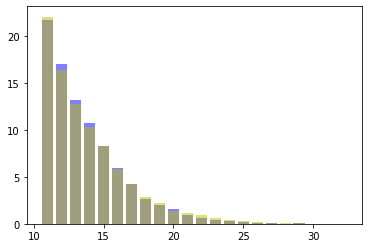

In [23]:
fig, ax = plt.subplots()
plt.bar(degrees_control.keys(), list(degrees_control.values()) / control_size, width=0.80, alpha=0.5, color="b")

plt.bar(degrees_patient.keys(), list(degrees_patient.values()) / patient_size, width=0.80, alpha=0.5, color="y")

plt.show()

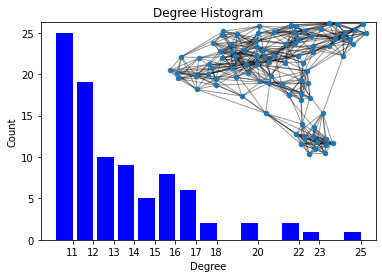

In [24]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

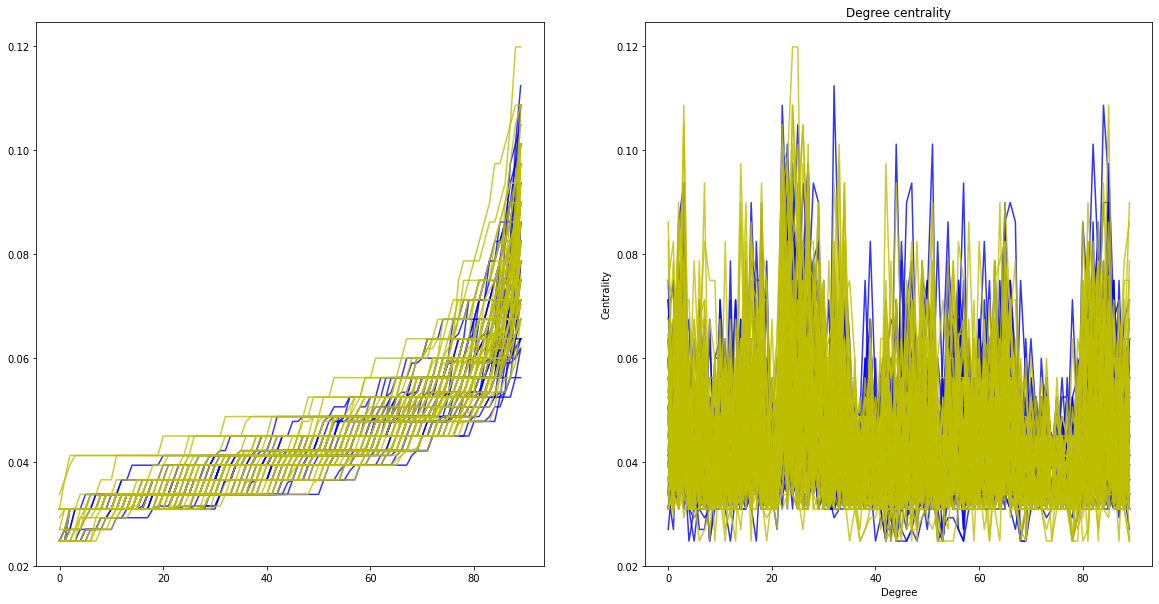

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.title("Degree centrality")
plt.ylabel("Centrality")
plt.xlabel("Degree")

for G in graphs:
    # centr = { k:v2/v1 for (k,v1), (k,v2) in zip(nx.eccentricity(G).items(),nx.degree_centrality(G).items())}

    centr = nx.closeness_vitality(G)

    centr_sorted = [ v for (k,v) in sorted(centr.items(), key=lambda kv: kv[1])]
    color = 'b' if G.graph['target'] == 0 else 'y'
    ax[0].plot(range(brain_regions),centr_sorted, c=color, alpha=0.8)
    ax[1].plot(range(brain_regions),centr.values(), c=color, alpha=0.8)

plt.show()

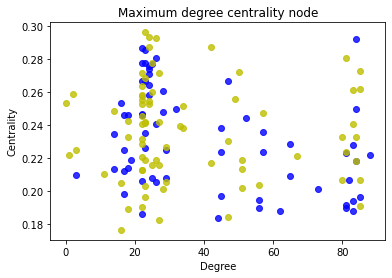

In [28]:
fig, ax = plt.subplots()

plt.title("Maximum degree centrality node")
plt.ylabel("Centrality")
plt.xlabel("Degree")

for G in graphs:
    centr = nx.eigenvector_centrality(G, max_iter=1000)
    centr_max = max(centr.items(), key=lambda kv: kv[1])

    color = 'b' if G.graph['target'] == 0 else 'y'
    ax.scatter(x=[centr_max[0]], y=[centr_max[1]], c=color, alpha=0.8)

plt.show()